In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [12]:
data_csv = r"D:\Masaüstü\ÜNİ\3_1\3.1_Projeler\Makine öğrenmesine giriş\machine\numeric.csv"
data = pd.read_csv(data_csv)
print(data)

     ilan   fiyati  sahip  yer  oda  balkon  yorum puanı  konum puanı  \
0     132  245.000    203   19    0       0         4.58          5.0   
1     207  324.000    152    8    0       0         4.66          4.8   
2     318  530.000    202   28    0       1         4.89          4.9   
3     326  348.000    219   28    0       1         4.45          4.3   
4     107  817.000    230   13    0       1         4.86          4.8   
..    ...      ...    ...  ...  ...     ...          ...          ...   
347   122    1.423     12   26    2       1         4.83          4.8   
348   219    1.404     30   26    5       1         5.00          4.9   
349     1  593.000     72    6    2       1         5.00          5.0   
350   335  950.000    111    6    1       1         4.90          4.8   
351   126  482.000      1    6    0       1         4.90          4.8   

     süper ev sahibi  değerlendirme sayısı  son değerlendirme  misafir  \
0                  0                    49       

In [6]:
#bağımlı ve bağımsız değişkeni ayırdık.
X = data.drop(["fiyati","ilan","sahip","değerlendirme sayısı","son değerlendirme"], axis = 1 ) #ilan adı ve ev sahibi etkilemesin.
y = data["fiyati"]

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X1 = sc_X.fit_transform(X)

In [8]:
#fit fonksiyonu model inşaasını uygulamaya çalışıyor.
sc_y = StandardScaler()
y1 = sc_y.fit_transform(y.values.reshape(-1,1))


In [9]:
# SVR modeli eğitme
svr_reg = SVR(kernel='rbf')#değişkenler arasındaki ilişki durumuna göre bir çekirdek seçilmeli
reg = svr_reg.fit(X1, y1)

y_pred = svr_reg.predict(X1)

C:\Users\BUKET\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn import metrics

print("------------------------------")
print("SVR r^2 degeri")
print("------------------------------")
print(r2_score(y1,y_pred))
print("------------------------------")
print("SVR RMSE degeri")#Root Mean Square Error(RMSE)
print("------------------------------")
print(np.sqrt(metrics.mean_squared_error(y1,y_pred)))
print("------------------------------")

------------------------------
SVR r^2 degeri
------------------------------
0.31368436707801695
------------------------------
SVR RMSE degeri
------------------------------
0.8284416895122935
------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

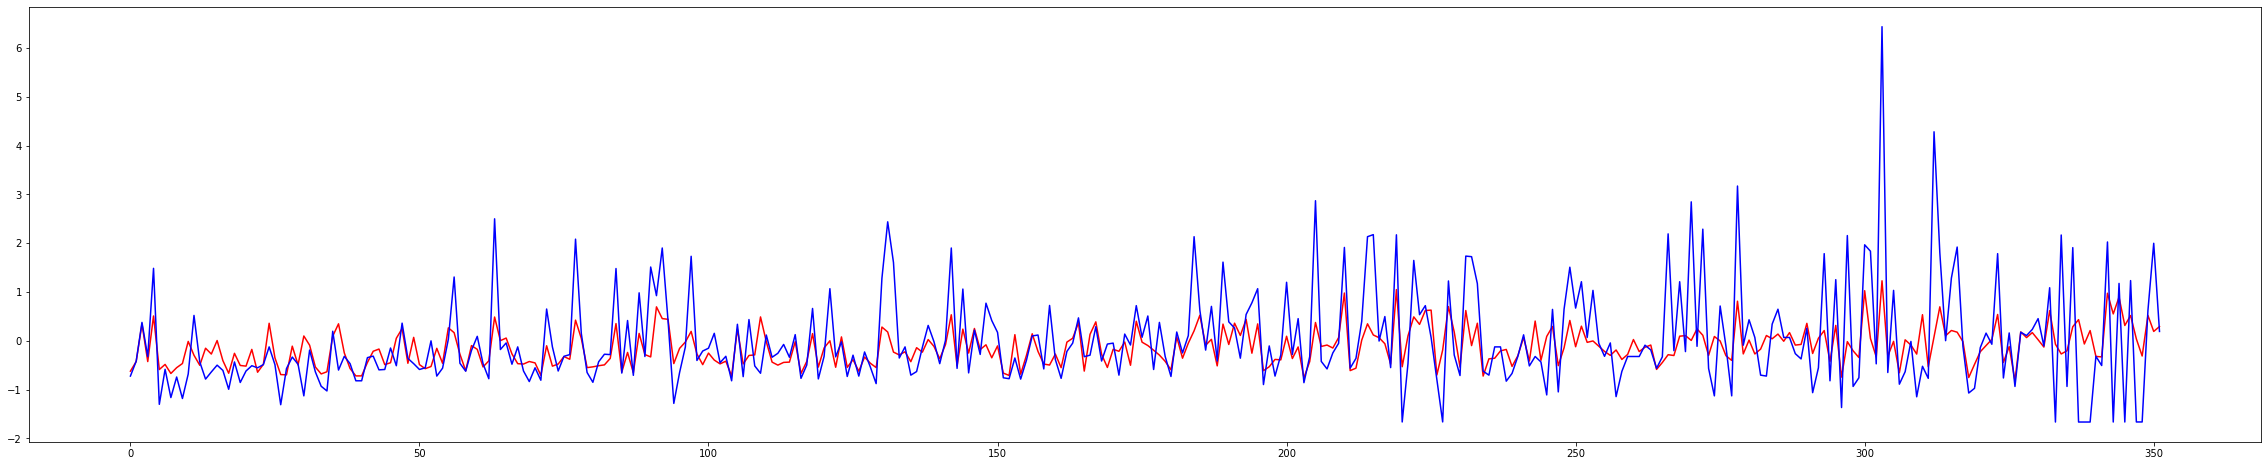

In [11]:
plt.figure(figsize=(40,8))
plt.plot(y_pred, color='red')
#plt.scatter(y1,y_pred,color='r')
plt.plot(y1,color='blue')
plt.show
